# Investigating use of Linear Regression as an option to predict flow, slump and compressive strength of concrete using _Concrete Slump Test Data Set_

This notebook is a "quick and dirty" attempt to apply regression to a datset from the UCI ML repository

Dataset here https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test


# 0. Set up jupyter-python environment  

### Import necessary (likely) libraries aand set maplotlib to inline

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Get data

### Let's check what's in our folder using bang + linux commands

In [ ]:
! pwd

/home/me/Documents/Data Science/MY PROJECTS/UCI Concrete Slump data

In [192]:
! ls

Regression_concrete_slump.ipynb  slump_test.data  slump_test.names


### Let's look at data and name files in our text editor

### NB Don't use _cat_ command within jupyter - there's a limit to how much you want to see from within the notebook!

In [193]:
! subl slump_test.names

The text in the above file informs us that we have 7 attributes (features) and 3 output variables

There are 103 data points

In [194]:
! subl slump_test.data

From looking at the data, we see that the column headings (which it will be useful to import) are present and that each row of data is preceded by an index field (which is unnecessary for us as it will duplicate the pandas dataframe's own index

Let's import the data...

In [195]:
df = pd.read_csv('slump_test.data')

Let's look at the head of the data frame...

In [196]:
df.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


Let's look at the column headers...

(Note that .columns is an attribute not a method so doesn't require parentheses)

In [197]:
df.columns 


Index(['No', 'Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

### Let's drop the 'No' column

In [198]:
df.drop(['No'],axis=1,inplace=True)
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


# 2. Exploratory Data Analysis

### We use .info() method to get a quick summary of our dataframe

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
Cement                                103 non-null float64
Slag                                  103 non-null float64
Fly ash                               103 non-null float64
Water                                 103 non-null float64
SP                                    103 non-null float64
Coarse Aggr.                          103 non-null float64
Fine Aggr.                            103 non-null float64
SLUMP(cm)                             103 non-null float64
FLOW(cm)                              103 non-null float64
Compressive Strength (28-day)(Mpa)    103 non-null float64
dtypes: float64(10)
memory usage: 8.1 KB


#### We can see that:
- there's no missing data, 
- we have the 103 data points we expected from our quick look at the .data and .name files in text editor, 
- all values are floats

### We use .describe to get summary of our *data*

In [200]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


### What are the distributions of our dependent variables?

#### Note: This is more for interest sake.  Linear regression does not assume normailty of predictors or y values. You do however want error terms (residuals) normally distributed

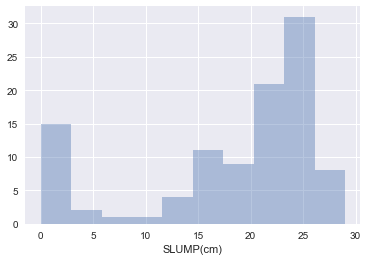

In [201]:
sns.distplot(df['SLUMP(cm)'],bins=10,kde=False)

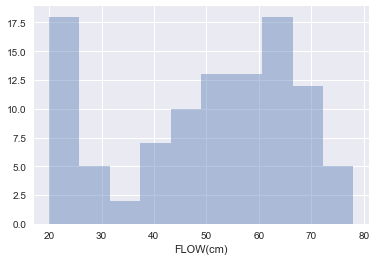

In [202]:
sns.distplot(df['FLOW(cm)'],bins=10,kde=False)

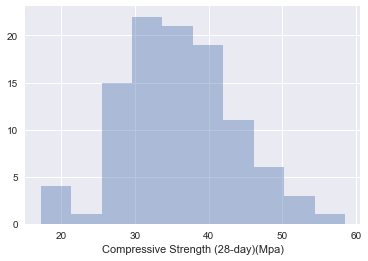

In [203]:
sns.distplot(df['Compressive Strength (28-day)(Mpa)'],bins=10,kde=False)

Slump and flow variables are possibly bimodal

Comp strength looks like it may be normal or poss skewed to right (to higher strengths)

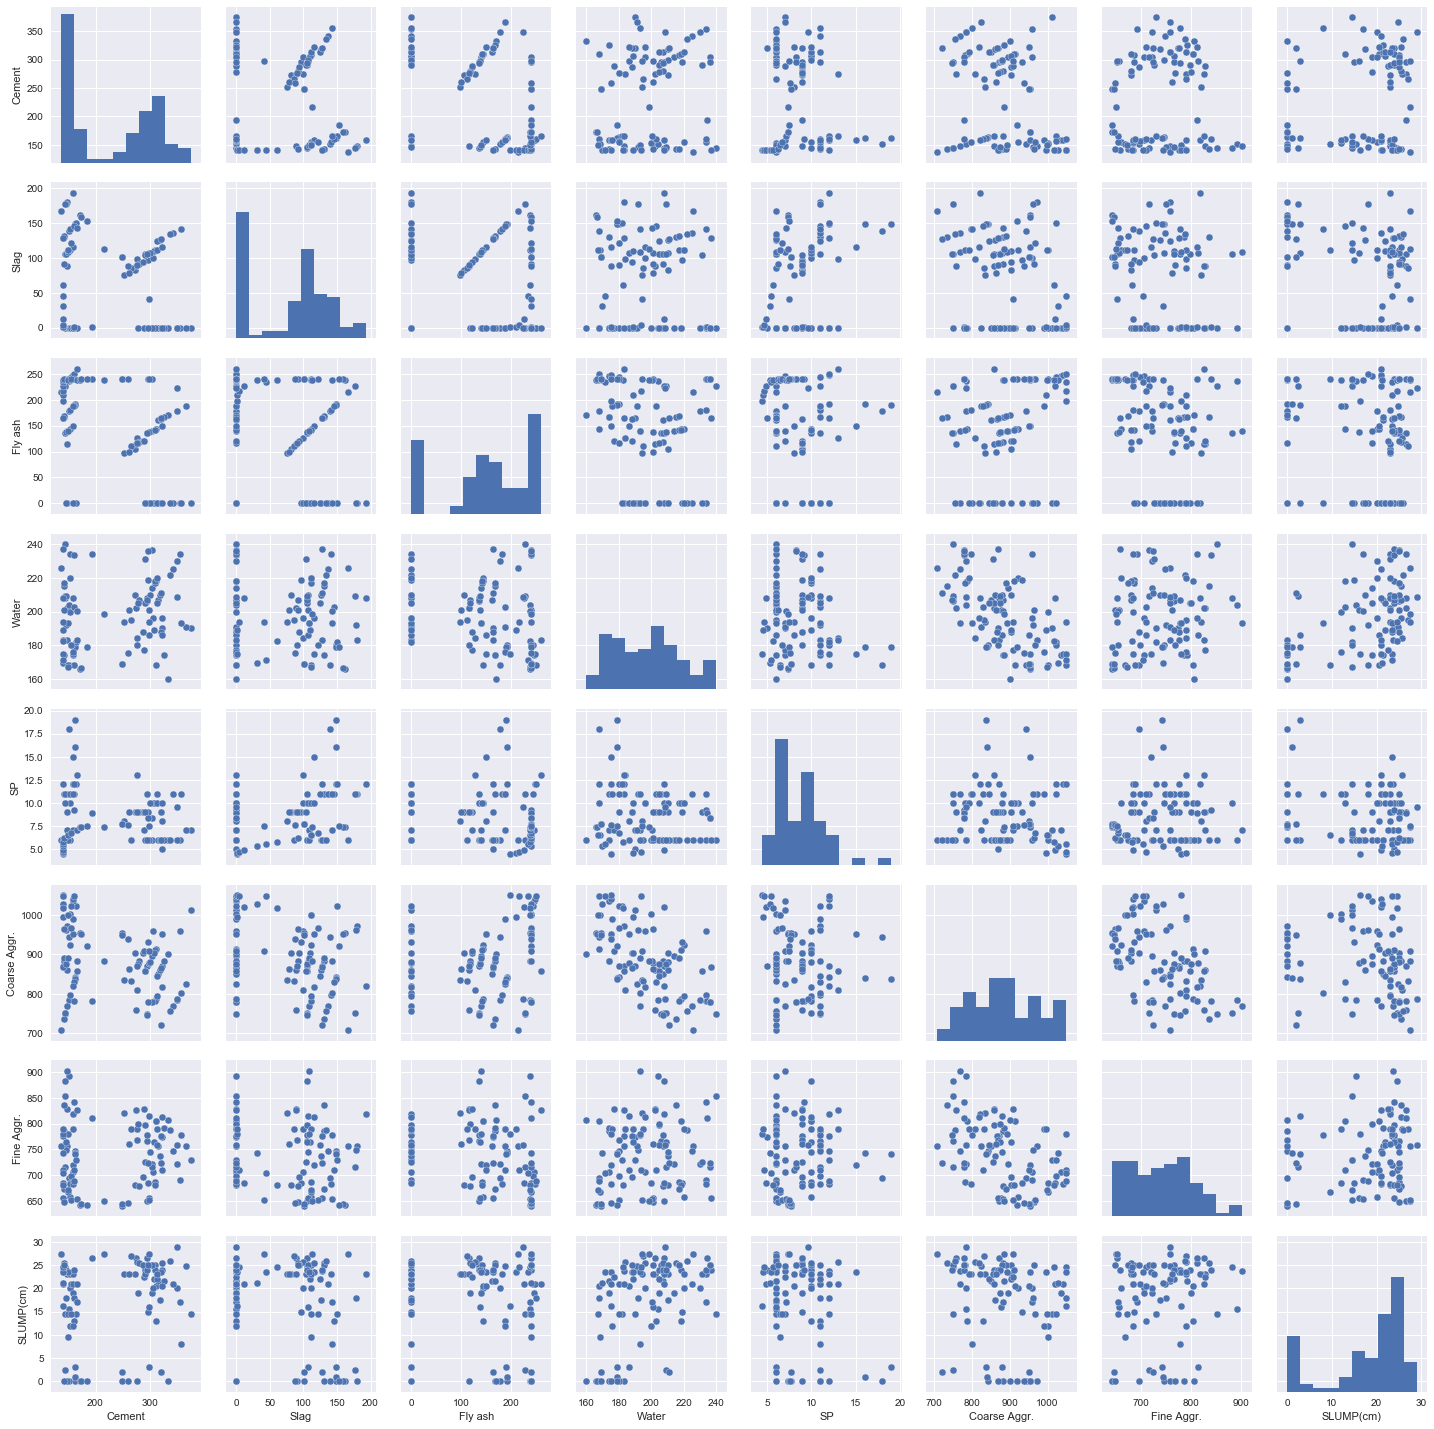

In [204]:
sns.pairplot(df.drop(['FLOW(cm)','Compressive Strength (28-day)(Mpa)'],axis=1))

^ This hasn't helped much!

Let's look at correlation coefficients...

In [205]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445725
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331588
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444393
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254235
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037871
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160684
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154484
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223358
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124029
Compressive Strength (28-day)(Mpa),0.445725,-0.331588,0.444393,-0.254235,-0.037871,-0.160684,-0.154484,-0.223358,-0.124029,1.000000


From the above, we see that water has the greatest positive correlation with slump and 
also with flow. (We also see that these 2 measures are highly correlated with each other.)

Water is negatively correlated with strength, so attempts to increase flow and slump will weaken cement.



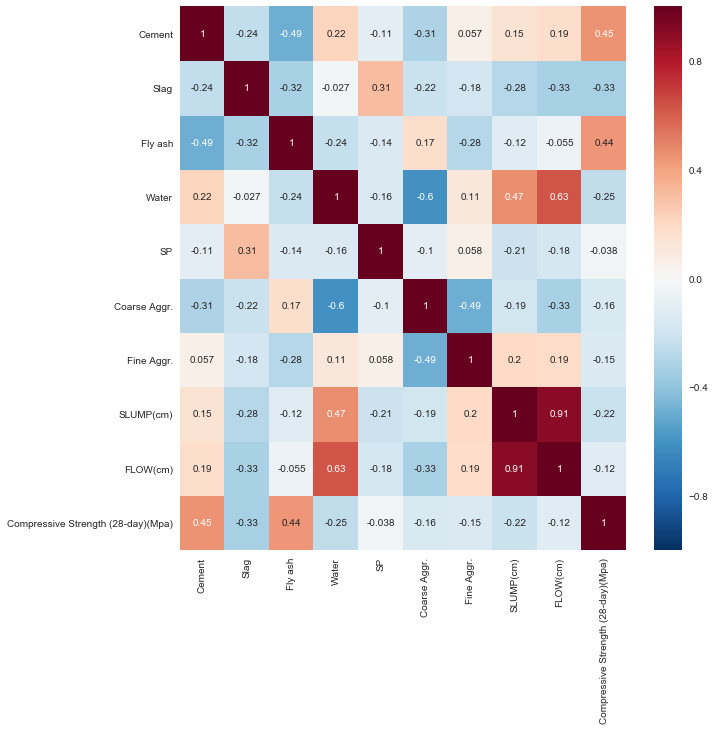

In [206]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

This plot gives us the same information that we got from our correelation table.  

We also note here that Fly Ash and Cement appear to be the most  important factors for creating compressive strength 

# BUILD MODELS

### i) SLUMP MODEL - FIT 

In [207]:
X = df.drop(['FLOW(cm)','Compressive Strength (28-day)(Mpa)','SLUMP(cm)'],axis=1)
y_slump = df['SLUMP(cm)']

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train, X_test, y_slump_train, y_slump_test = train_test_split(X, y_slump, test_size=0.33, random_state=42)

In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
lrm_slump = LinearRegression()

In [212]:
lrm_slump.fit(X_train, y_slump_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### i) SLUMP MODEL - INSPECT

In [213]:
lrm_slump.intercept_

-19.21485554610873

In [214]:
lrm_slump.coef_

array([-0.00164352, -0.02444763, -0.01354346,  0.19461704, -0.54451993,
        0.00180974,  0.00815306])

In [215]:
coeff_df_slump = pd.DataFrame(lrm_slump.coef_,index=X.columns, columns = ['Slump Coefficients'])
coeff_df

,Slump Coefficients
Cement,-0.001644
Slag,-0.024448
Fly ash,-0.013543
Water,0.194617
SP,-0.544520
Coarse Aggr.,0.001810
Fine Aggr.,0.008153


### i) SLUMP MODEL - PREDICTIONS

In [216]:
y_slump_preds = lrm_slump.predict(X_test)
slump_preds

array([ 20.17603134,  13.82433085,  20.77062915,  15.37448147,
        15.21314762,  15.02084635,  12.72711022,  22.3515578 ,
        19.70688973,  20.05868336,  13.79856871,  26.59462553,
        25.80575717,  15.63606528,  14.47848863,  20.24930647,
        20.1772069 ,  19.1296226 ,  21.83347932,  19.43880984,
        11.90745897,  22.53000851,  13.69746699,  19.92980619,
        18.84663828,  10.29733002,   9.15499688,  20.5821581 ,
        13.81943703,  24.27658749,  14.25679217,  18.48796399,
        16.67871844,  17.90654047])

In [217]:
### i) SLUMP MODEL - ASSESS

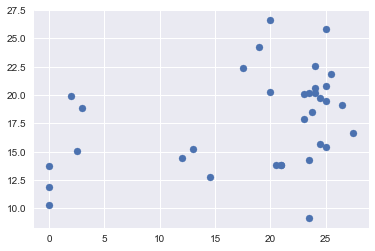

In [218]:
plt.scatter(y_slump_test,y_slump_preds)

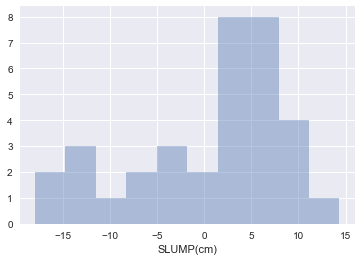

In [219]:
sns.distplot(y_slump_test-y_slump_preds,kde=False, bins = 10)

In [220]:
# Residuals not normally distributed!  Bad sign!

In [221]:
from sklearn import metrics

In [222]:
metrics.mean_absolute_error(y_slump_test, y_slump_preds)

6.8044262690684265

In [223]:
metrics.mean_squared_error(y_slump_test, y_slump_preds)

65.982742803145612

In [224]:
np.sqrt(metrics.mean_squared_error(y_slump_test, y_slump_preds))

8.1229762281534228

### ii) COMP STRENGTH MODEL - FIT 

In [225]:
y_comp_strength = df['Compressive Strength (28-day)(Mpa)']

In [226]:
# train test split already imported

In [227]:
X_train, X_test, y_comp_strength_train, y_comp_strength_test = train_test_split(X, y_comp_strength, test_size=0.33, random_state=42)

In [228]:
# lr model already imported

In [229]:
lrm = LinearRegression()

In [230]:
lrm.fit(X_train, y_comp_strength_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### ii) COMP STRENGTH MODEL - INSPECT 

In [231]:
lrm.intercept_

184.77818828466206

In [232]:
lrm.coef_

array([ 0.04286509, -0.04984839,  0.03589284, -0.27327496,  0.056004  ,
       -0.0754496 , -0.05382379])

In [233]:
coeff_df_comp_strength = pd.DataFrame(lrm.coef_,
                                      index = X_train.columns, columns=['Compressive Strength Coefficients'])
coeff_df_comp_strength

,Compressive Strength Coefficients
Cement,0.042865
Slag,-0.049848
Fly ash,0.035893
Water,-0.273275
SP,0.056004
Coarse Aggr.,-0.075450
Fine Aggr.,-0.053824


### The low correlation for cement seems surprising given heatmap.  Let's look at scatter plot.

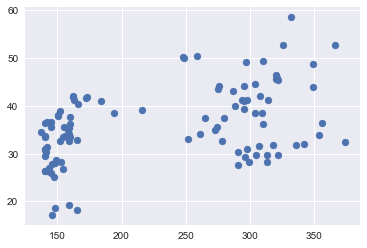

In [234]:
plt.scatter(df['Cement'],df['Compressive Strength (28-day)(Mpa)'])

Hmmm.  Correlation, but not of much predictive value. Let's do the predictions anyway

### ii) COMP STRENGTH MODEL - PREDICTIONS 

In [235]:
y_comp_strength_preds = lrm.predict(X_test)

### ii) COMP STRENGTH MODEL - ASSESS 

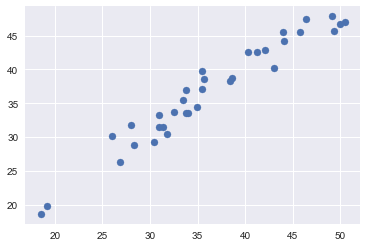

In [236]:
plt.scatter(y_comp_strength_test, y_comp_strength_preds)

Hmmm.  That looks half decent.  Do residuals look normal?

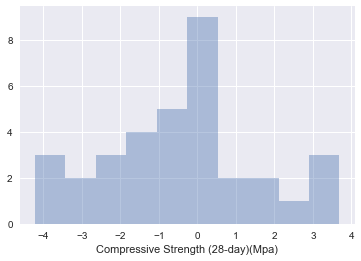

In [237]:
sns.distplot(y_comp_strength_test-y_comp_strength_preds,kde=False,bins=10)

Errors don't look normally distributed.  Predictions at extremes of compressive strength are losing accuracy

In [238]:
from sklearn import metrics

In [239]:
metrics.regression.mean_absolute_error(y_comp_strength_test, y_comp_strength_preds)

1.5773244045344947

In [240]:
metrics.mean_absolute_error(y_comp_strength_test, y_comp_strength_preds)

1.5773244045344947

In [241]:
metrics.mean_squared_error(y_comp_strength_test, y_comp_strength_preds)

4.1954651701781227

In [242]:
np.sqrt(metrics.mean_squared_error(y_comp_strength_test, y_comp_strength_preds))

2.0482834691951508